In [1]:
import re
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
sns.set_theme()

## Full Mini CodeNet

### Load all data in Mini-CodeNet

In [3]:
mini_path = "../mini_codenet/data/"
data_frames = []
total_rows = 0

for file_name in os.listdir(mini_path):
    if file_name.endswith(".ftr"):
        file_path = mini_path + file_name
        df = pd.read_feather(file_path)

        total_rows += len(df)
        data_frames.append(df)

print("Total Number of Rows:", total_rows)
data = pd.concat(data_frames)

del data_frames

data.reset_index(drop=True, inplace=True)

data

Total Number of Rows: 3011621


/var/folders/ww/02m6b2_s1bl0sbzz4jq19n500000gn/T/ipykernel_77121/507929191.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(data_frames)


,index,submission_id,problem_id,language,filename_ext,status,cpu_time,memory,code_size,accuracy,solution
0,3,s754682433,p03916,C++,cpp,Accepted,882.0,79488.0,2104,NaN,"// #pragma GCC target(""avx2"") // CPU 処理並列化\n/..."
1,5,s294060576,p03916,C++,cpp,Accepted,294.0,47232.0,3274,NaN,#include <iostream>\n#include <vector>\n#inclu...
2,15,s959280567,p03916,C++,cpp,Accepted,74.0,19584.0,1302,NaN,#include<bits/stdc++.h>\n#define re register\n...
3,196,s370173396,p03916,C++,cpp,Accepted,478.0,28860.0,1119,NaN,#include <cstdio>\n#include <iostream>\n#inclu...
4,63,s697678665,p03916,C++,cpp,Accepted,42.0,6016.0,664,NaN,#include <iostream>\n#include <cstdio>\n#inclu...
...,...,...,...,...,...,...,...,...,...,...,...
3011616,40,s279304026,p03933,C++,cpp,Wrong Answer,116.0,1152.0,2024,NaN,#include<bits/stdc++.h>\nusing namespace std;\...
3011617,130,s669360351,p03933,C++,cpp,Wrong Answer,85.0,4464.0,994,NaN,#include <bits/stdc++.h>\nusing namespace std;...
3011618,9,s253699538,p03933,C++,cpp,Wrong Answer,1.0,256.0,98,NaN,#include<bits/stdc++.h>\nusing namespace std;\...
3011619,92,s329252459,p03933,C++,cpp,Wrong Answer,261.0,1152.0,1685,NaN,#include <bits/stdc++.h>\n\nusing namespace st...


## Mini CodeNet Full Data Stats

language
C          188487
C++       2001007
Python     822127
Name: language, dtype: int64


<Axes: >

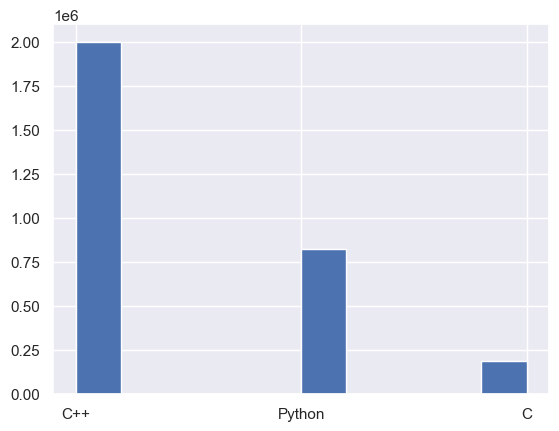

In [4]:
print(data.groupby(["language"])["language"].count())

data["language"].hist()

status
Accepted                  1615728
Compile Error              115468
Internal error                 22
Judge Not Available            21
Judge System Error              1
Memory Limit Exceeded        3985
Output Limit Exceeded         187
Query Limit Exceeded           23
Runtime Error              186769
Time Limit Exceeded        163858
WA: Presentation Error      14414
Wrong Answer               911145
Name: status, dtype: int64


<Axes: >

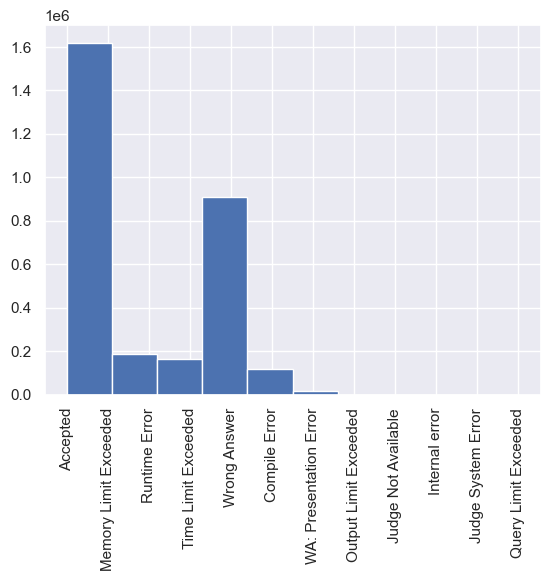

In [5]:
print(data.groupby(["status"])["status"].count())

plt.xticks(rotation=90)
data["status"].hist()

Problems with status "Judge Not Available," "Judge System Error," and "Internal Error" should be removed form the dataset, since we don not know whether or not the answers are correct.

In [6]:
# Filter rows where the status is JNA, JSE, or IE
data = data[~(data["status"].isin(["Judge Not Available", "Judge System Error", "Internal error"]))]

data

,index,submission_id,problem_id,language,filename_ext,status,cpu_time,memory,code_size,accuracy,solution
0,3,s754682433,p03916,C++,cpp,Accepted,882.0,79488.0,2104,NaN,"// #pragma GCC target(""avx2"") // CPU 処理並列化\n/..."
1,5,s294060576,p03916,C++,cpp,Accepted,294.0,47232.0,3274,NaN,#include <iostream>\n#include <vector>\n#inclu...
2,15,s959280567,p03916,C++,cpp,Accepted,74.0,19584.0,1302,NaN,#include<bits/stdc++.h>\n#define re register\n...
3,196,s370173396,p03916,C++,cpp,Accepted,478.0,28860.0,1119,NaN,#include <cstdio>\n#include <iostream>\n#inclu...
4,63,s697678665,p03916,C++,cpp,Accepted,42.0,6016.0,664,NaN,#include <iostream>\n#include <cstdio>\n#inclu...
...,...,...,...,...,...,...,...,...,...,...,...
3011616,40,s279304026,p03933,C++,cpp,Wrong Answer,116.0,1152.0,2024,NaN,#include<bits/stdc++.h>\nusing namespace std;\...
3011617,130,s669360351,p03933,C++,cpp,Wrong Answer,85.0,4464.0,994,NaN,#include <bits/stdc++.h>\nusing namespace std;...
3011618,9,s253699538,p03933,C++,cpp,Wrong Answer,1.0,256.0,98,NaN,#include<bits/stdc++.h>\nusing namespace std;\...
3011619,92,s329252459,p03933,C++,cpp,Wrong Answer,261.0,1152.0,1685,NaN,#include <bits/stdc++.h>\n\nusing namespace st...


## Mini CodeNet English Problems

In [7]:
problem_languages = pd.read_csv("../problem_analysis/log.tsv", delimiter="\t")
problem_languages["problem_id"] = [p[:-5] for p in problem_languages["Problem"]]
problem_languages

,Problem,Language,problem_id
0,p00000.html,en,p00000
1,p00001.html,en,p00001
2,p00002.html,en,p00002
3,p00003.html,en,p00003
4,p00004.html,en,p00004
...,...,...,...
3994,p04048.html,en,p04048
3995,p04049.html,en,p04049
3996,p04050.html,en,p04050
3997,p04051.html,en,p04051


In [8]:
en_problems = problem_languages[problem_languages["Language"] == "en"]
en_problems.reset_index(drop=True, inplace=True)

en_problems

,Problem,Language,problem_id
0,p00000.html,en,p00000
1,p00001.html,en,p00001
2,p00002.html,en,p00002
3,p00003.html,en,p00003
4,p00004.html,en,p00004
...,...,...,...
2664,p04048.html,en,p04048
2665,p04049.html,en,p04049
2666,p04050.html,en,p04050
2667,p04051.html,en,p04051


In [9]:
# Filter submissions whose problem language is in English
en_data = data[data["problem_id"].isin(en_problems["problem_id"].unique())]

# Free-up some memory
del data, problem_languages, en_problems

en_data

,index,submission_id,problem_id,language,filename_ext,status,cpu_time,memory,code_size,accuracy,solution
0,3,s754682433,p03916,C++,cpp,Accepted,882.0,79488.0,2104,NaN,"// #pragma GCC target(""avx2"") // CPU 処理並列化\n/..."
1,5,s294060576,p03916,C++,cpp,Accepted,294.0,47232.0,3274,NaN,#include <iostream>\n#include <vector>\n#inclu...
2,15,s959280567,p03916,C++,cpp,Accepted,74.0,19584.0,1302,NaN,#include<bits/stdc++.h>\n#define re register\n...
3,196,s370173396,p03916,C++,cpp,Accepted,478.0,28860.0,1119,NaN,#include <cstdio>\n#include <iostream>\n#inclu...
4,63,s697678665,p03916,C++,cpp,Accepted,42.0,6016.0,664,NaN,#include <iostream>\n#include <cstdio>\n#inclu...
...,...,...,...,...,...,...,...,...,...,...,...
3011616,40,s279304026,p03933,C++,cpp,Wrong Answer,116.0,1152.0,2024,NaN,#include<bits/stdc++.h>\nusing namespace std;\...
3011617,130,s669360351,p03933,C++,cpp,Wrong Answer,85.0,4464.0,994,NaN,#include <bits/stdc++.h>\nusing namespace std;...
3011618,9,s253699538,p03933,C++,cpp,Wrong Answer,1.0,256.0,98,NaN,#include<bits/stdc++.h>\nusing namespace std;\...
3011619,92,s329252459,p03933,C++,cpp,Wrong Answer,261.0,1152.0,1685,NaN,#include <bits/stdc++.h>\n\nusing namespace st...


### Mini CodeNet English Data Stats

language
C          168541
C++       1903058
Python     812923
Name: language, dtype: int64


<Axes: >

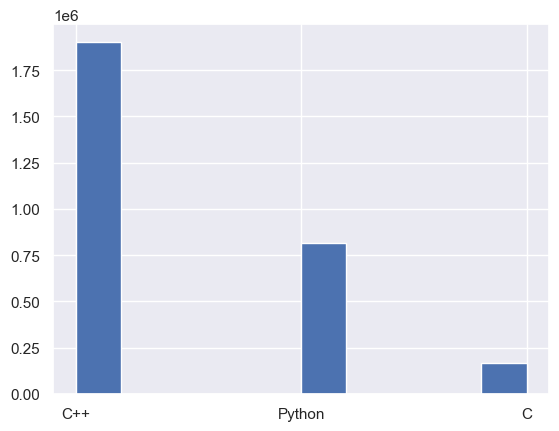

In [10]:
print(en_data.groupby(["language"])["language"].count())

en_data["language"].hist()

status
Accepted                  1552853
Compile Error              108714
Memory Limit Exceeded        2369
Output Limit Exceeded         176
Query Limit Exceeded           23
Runtime Error              179175
Time Limit Exceeded        156484
WA: Presentation Error      11760
Wrong Answer               872968
Name: status, dtype: int64


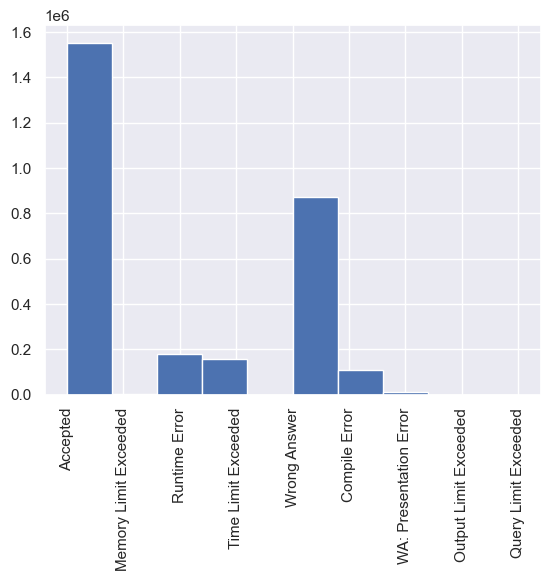

In [11]:
print(en_data.groupby(["status"])["status"].count())

plt.xticks(rotation=90)
a = en_data["status"].hist()

## Append Problem Statements to the Submissions

In [12]:
def do_clean(inp):
    txt = inp.replace("<pre>", "```").replace("</pre>", "```") # Replace `pre` tags with triple backticks
    txt = re.sub(f"<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>", "  ", txt) # Remove all HTML tags
    txt = re.sub("(\n\s*\n)", "\n", txt) # Remove consecutive newlines
    return re.sub("( +)", " ", txt).strip() # Remove consecutive spaces

problems_contents = {
    "problem_id": [],
    "problem_statement": []
}

for problem_id in tqdm(en_data["problem_id"].unique()):
    with open(f"./problem_descriptions/{problem_id}.html", "r") as problem_contents:
        problems_contents["problem_id"].append(problem_id)
        problems_contents["problem_statement"].append(do_clean(problem_contents.read()))

problems_contents = pd.DataFrame(problems_contents)
problems_contents

100%|██████████| 2627/2627 [00:00<00:00, 3507.55it/s]


,problem_id,problem_statement
0,p03916,Score : 1600 points \n Problem Statement There...
1,p03902,Score : 1200 points \n Problem Statement Takah...
2,p01683,MathJax.Hub.Config({ tex2jax: { inlineMath: [[...
3,p03094,Score : 1800 points \n Problem Statement We ha...
4,p03080,Score : 200 points \n Problem Statement \n The...
...,...,...
2622,p03927,Score : 1900 points \n Problem Statement Snuke...
2623,p00590,Pair of Primes \n We arrange the numbers betwe...
2624,p03099,Score : 1300 points \n Problem Statement A mus...
2625,p02393,Sorting Three Numbers \n Write a program which...


In [13]:
mini_CodeNet_en_with_problems = pd.merge(
    left=en_data,
    right=problems_contents,
    left_on="problem_id",
    right_on="problem_id"
)

mini_CodeNet_en_with_problems

,index,submission_id,problem_id,language,filename_ext,status,cpu_time,memory,code_size,accuracy,solution,problem_statement
0,3,s754682433,p03916,C++,cpp,Accepted,882.0,79488.0,2104,NaN,"// #pragma GCC target(""avx2"") // CPU 処理並列化\n/...",Score : 1600 points \n Problem Statement There...
1,5,s294060576,p03916,C++,cpp,Accepted,294.0,47232.0,3274,NaN,#include <iostream>\n#include <vector>\n#inclu...,Score : 1600 points \n Problem Statement There...
2,15,s959280567,p03916,C++,cpp,Accepted,74.0,19584.0,1302,NaN,#include<bits/stdc++.h>\n#define re register\n...,Score : 1600 points \n Problem Statement There...
3,196,s370173396,p03916,C++,cpp,Accepted,478.0,28860.0,1119,NaN,#include <cstdio>\n#include <iostream>\n#inclu...,Score : 1600 points \n Problem Statement There...
4,63,s697678665,p03916,C++,cpp,Accepted,42.0,6016.0,664,NaN,#include <iostream>\n#include <cstdio>\n#inclu...,Score : 1600 points \n Problem Statement There...
...,...,...,...,...,...,...,...,...,...,...,...,...
2884517,40,s279304026,p03933,C++,cpp,Wrong Answer,116.0,1152.0,2024,NaN,#include<bits/stdc++.h>\nusing namespace std;\...,Max Score: $850$ Points \n Problem statement \...
2884518,130,s669360351,p03933,C++,cpp,Wrong Answer,85.0,4464.0,994,NaN,#include <bits/stdc++.h>\nusing namespace std;...,Max Score: $850$ Points \n Problem statement \...
2884519,9,s253699538,p03933,C++,cpp,Wrong Answer,1.0,256.0,98,NaN,#include<bits/stdc++.h>\nusing namespace std;\...,Max Score: $850$ Points \n Problem statement \...
2884520,92,s329252459,p03933,C++,cpp,Wrong Answer,261.0,1152.0,1685,NaN,#include <bits/stdc++.h>\n\nusing namespace st...,Max Score: $850$ Points \n Problem statement \...


In [14]:
mini_CodeNet_en_with_problems.to_feather("../mini_codenet/en_mini_codenet.ftr")